# Task 2: Customer Segmentation (Clustering)

- We will use **KMeans clustering** to group customers.
- Apply **Elbow method** to find the optimal number of clusters.
- Visualize the clusters.
- Perform **DBSCAN** as a bonus.


In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler


In [7]:
# 2. Load Dataset
import pandas as pd

df = pd.read_csv(r"C:\Users\AAFIA\Desktop\Customer Segmentation\Mall_Customers.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Missing Values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Summary Statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


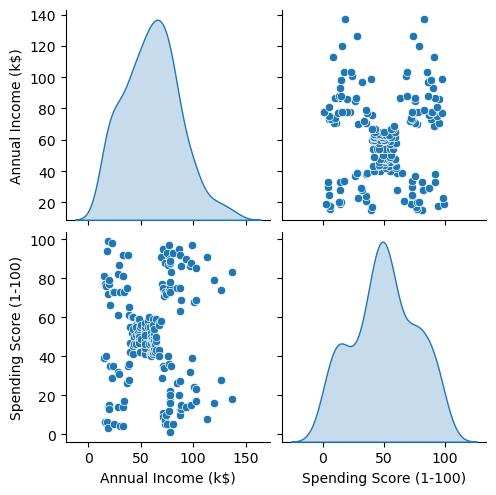

In [8]:
# 3. Data Exploration
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

sns.pairplot(df[["Annual Income (k$)", "Spending Score (1-100)"]], diag_kind="kde")
plt.show()

In [9]:
# 4. Preprocessing
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


D:\anacondaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anacondaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anacondaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anacondaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

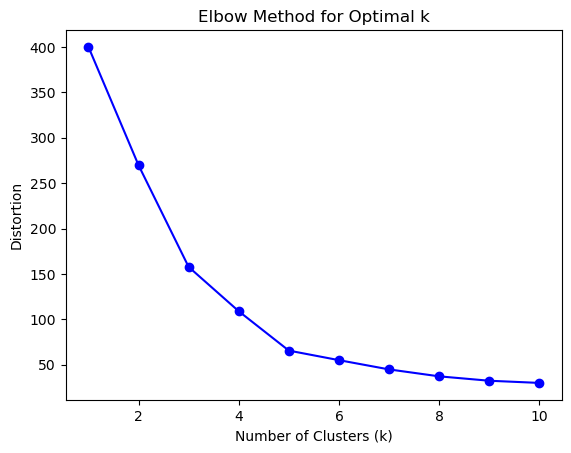

In [14]:
# 5. K-Means Clustering - Elbow Method
import os
os.environ["OMP_NUM_THREADS"] = "1"   # MKL memory leak fix (Windows only)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)  # set n_init explicitly
    km.fit(X_scaled)
    distortions.append(km.inertia_)

plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

import warnings
warnings.filterwarnings("ignore")


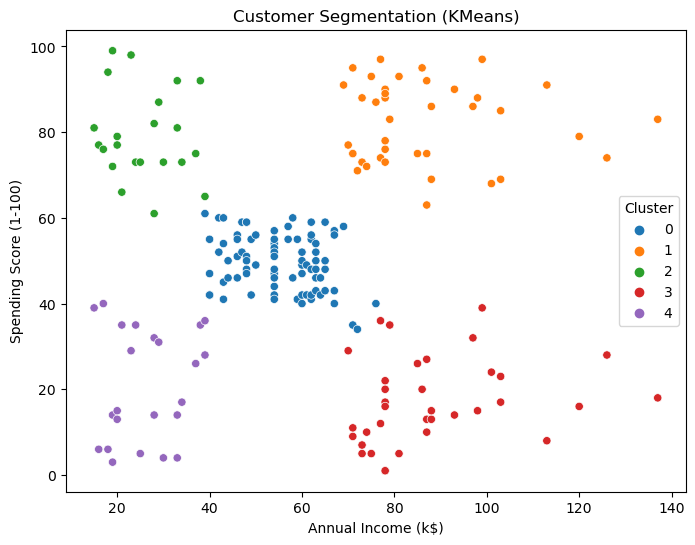

In [15]:
# Train final KMeans model (choose k=5 from Elbow observation)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df['Cluster'], palette="tab10")
plt.title("Customer Segmentation (KMeans)")
plt.show()

In [16]:
# 6. Cluster Analysis
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nAverage Income & Spending per Cluster:\n", cluster_summary)



Average Income & Spending per Cluster:
          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


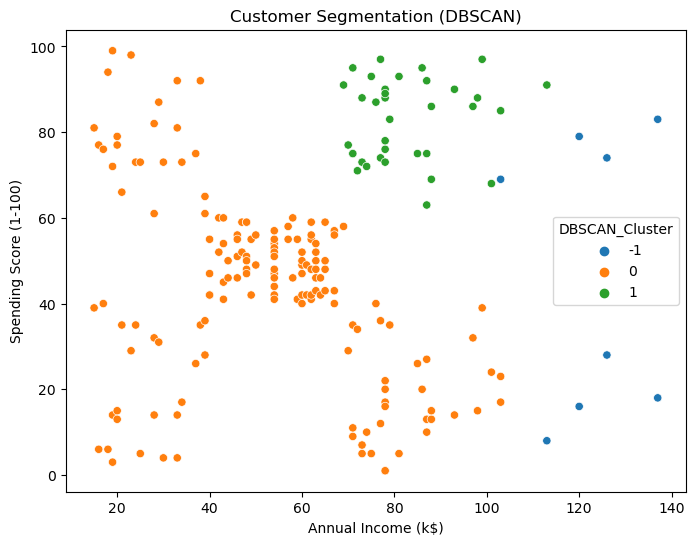

In [17]:
# 7. Bonus: DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df['DBSCAN_Cluster'], palette="tab10")
plt.title("Customer Segmentation (DBSCAN)")
plt.show()